# Trabajo previo al analisis de Datos Temblores 2023

---





Voy a cargar archivos de un CSV con .read_csv, pero para esto lo tengo que carar aquí en colab, para esto se importa de goole.colab a files
  

## Revew of the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving earthquakes_2023_global.csv to earthquakes_2023_global.csv


In [ ]:
for temblores in uploaded.keys():
  print(f"Archivo cargado: {temblores}")

Archivo cargado: earthquakes_2023_global.csv


In [ ]:
#ahora si hay que leer el csv
import pandas as pd

tmbl = pd.read_csv(temblores)

.head() first 5 rows

In [ ]:
#Vamos a ver que hay en el archio viendo las primeras 5 filas
print(tmbl.head())

                       time  latitude  longitude   depth   mag magType   nst  \
0  2023-01-01T00:49:25.294Z   52.0999   178.5218  82.770  3.10      ml  14.0   
1  2023-01-01T01:41:43.755Z    7.1397   126.7380  79.194  4.50      mb  32.0   
2  2023-01-01T03:29:31.070Z   19.1631   -66.5251  24.000  3.93      md  23.0   
3  2023-01-01T04:09:32.814Z   -4.7803   102.7675  63.787  4.30      mb  17.0   
4  2023-01-01T04:29:13.793Z   53.3965  -166.9417  10.000  3.00      ml  19.0   

     gap    dmin   rms  ...                   updated  \
0  139.0  0.8700  0.18  ...  2023-03-11T22:51:52.040Z   
1  104.0  1.1520  0.47  ...  2023-03-11T22:51:45.040Z   
2  246.0  0.8479  0.22  ...  2023-03-11T22:51:29.040Z   
3  187.0  0.4570  0.51  ...  2023-03-11T22:51:45.040Z   
4  190.0  0.4000  0.31  ...  2023-03-11T22:51:38.040Z   

                                   place        type horizontalError  \
0  Rat Islands, Aleutian Islands, Alaska  earthquake            8.46   
1        23 km ESE of Manay, Phi

In [ ]:
#ahora queremos ver cuantos datos tenemos
print(tmbl.shape)

(26642, 22)


I want to separate the Time row into date and another for hour. First you have to transform the data into a data frame

In [ ]:
df = pd.DataFrame(tmbl)

Ahora ya podemos utilizar .split

In [ ]:
print(df['time'])

0        2023-01-01T00:49:25.294Z
1        2023-01-01T01:41:43.755Z
2        2023-01-01T03:29:31.070Z
3        2023-01-01T04:09:32.814Z
4        2023-01-01T04:29:13.793Z
                   ...           
26637    2023-12-29T03:37:19.334Z
26638    2023-12-29T04:38:54.109Z
26639    2023-12-29T08:42:05.747Z
26640    2023-12-29T11:02:48.679Z
26641    2023-12-29T16:31:16.656Z
Name: time, Length: 26642, dtype: object


In [ ]:
df_t=df['time']
print(df_t)

0        2023-01-01T00:49:25.294Z
1        2023-01-01T01:41:43.755Z
2        2023-01-01T03:29:31.070Z
3        2023-01-01T04:09:32.814Z
4        2023-01-01T04:29:13.793Z
                   ...           
26637    2023-12-29T03:37:19.334Z
26638    2023-12-29T04:38:54.109Z
26639    2023-12-29T08:42:05.747Z
26640    2023-12-29T11:02:48.679Z
26641    2023-12-29T16:31:16.656Z
Name: time, Length: 26642, dtype: object


In [ ]:
df_t = pd.DataFrame(df_t)

In [ ]:
df_t[['Date','Time']]= df_t['time'].str.split('T', 1, expand = True)
print(df_t)

                           time        Date           Time
0      2023-01-01T00:49:25.294Z  2023-01-01  00:49:25.294Z
1      2023-01-01T01:41:43.755Z  2023-01-01  01:41:43.755Z
2      2023-01-01T03:29:31.070Z  2023-01-01  03:29:31.070Z
3      2023-01-01T04:09:32.814Z  2023-01-01  04:09:32.814Z
4      2023-01-01T04:29:13.793Z  2023-01-01  04:29:13.793Z
...                         ...         ...            ...
26637  2023-12-29T03:37:19.334Z  2023-12-29  03:37:19.334Z
26638  2023-12-29T04:38:54.109Z  2023-12-29  04:38:54.109Z
26639  2023-12-29T08:42:05.747Z  2023-12-29  08:42:05.747Z
26640  2023-12-29T11:02:48.679Z  2023-12-29  11:02:48.679Z
26641  2023-12-29T16:31:16.656Z  2023-12-29  16:31:16.656Z

[26642 rows x 3 columns]


<ipython-input-11-6f10446d7d71>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_t[['Date','Time']]= df_t['time'].str.split('T', 1, expand = True)


Now I'm going to take the time out and put it into the original data.

In [ ]:
df_t = df_t.drop('time', axis=1)
print(df_t)

             Date           Time
0      2023-01-01  00:49:25.294Z
1      2023-01-01  01:41:43.755Z
2      2023-01-01  03:29:31.070Z
3      2023-01-01  04:09:32.814Z
4      2023-01-01  04:29:13.793Z
...           ...            ...
26637  2023-12-29  03:37:19.334Z
26638  2023-12-29  04:38:54.109Z
26639  2023-12-29  08:42:05.747Z
26640  2023-12-29  11:02:48.679Z
26641  2023-12-29  16:31:16.656Z

[26642 rows x 2 columns]


Ahora vamos a insertar df_t que es la fecha separada al data frame oriinal, que es = tmbl

In [ ]:
tmbl[['Date', 'Time']]=df_t[['Date','Time']]

#pero quiero que me los argegue al principio, entonces las voy a eliminar
tmbl= tmbl.drop(['Time', 'Date'], axis = 1)
tmbl.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [ ]:
#ahora vamos a insertar la columna donde va
tmbl.insert(0,'date', df_t['Date'])


In [ ]:
tmbl.insert(1,'Time', df_t['Time'])

In [ ]:
tmbl.head()

,date,Time,time,latitude,longitude,depth,mag,magType,nst,gap,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01,00:49:25.294Z,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01,01:41:43.755Z,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01,03:29:31.070Z,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01,04:09:32.814Z,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01,04:29:13.793Z,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


Delete time

In [ ]:
tmbl = tmbl.drop('time', axis=1)

In [ ]:
tmbl.head()

,date,Time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01,00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01,01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01,03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01,04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01,04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


Ya tenemos los datos de la fecha y la hora separados. Ahora quiero quitarle la Z al tiempo

In [ ]:
tiempo = pd.DataFrame(tmbl['Time'])
tiempo.head()

,Time
0,00:49:25.294Z
1,01:41:43.755Z
2,03:29:31.070Z
3,04:09:32.814Z
4,04:29:13.793Z


In [ ]:
tiempo['Time'] = tiempo['Time'].str.replace('Z','')
tiempo.head()

,Time
0,00:49:25.294
1,01:41:43.755
2,03:29:31.070
3,04:09:32.814
4,04:29:13.793


Ahora insertamos la nueva columna en tmbl

In [ ]:
tmbl.insert(1, 'time', tiempo['Time'])
tmbl.head()

,date,time,Time,latitude,longitude,depth,mag,magType,nst,gap,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01,00:49:25.294,00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01,01:41:43.755,01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01,03:29:31.070,03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01,04:09:32.814,04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01,04:29:13.793,04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [ ]:
#Borramos la de tiempo anterior
tmbl = tmbl.drop('Time', axis=1)

In [ ]:
tmbl.head()

,date,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01,00:49:25.294,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01,01:41:43.755,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01,03:29:31.070,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01,04:09:32.814,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01,04:29:13.793,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


Ahora vamos a ver que nos sire: Matype, nst,ap, dmin, update, type, magnst, MaSource

In [ ]:
tmbl=tmbl.drop(['magType','nst', 'gap', 'dmin', 'updated', 'magNst', 'magSource'], axis=1)

In [ ]:
tmbl.head()

,date,time,latitude,longitude,depth,mag,rms,net,id,place,type,horizontalError,depthError,magError,status,locationSource
0,2023-01-01,00:49:25.294,52.0999,178.5218,82.770,3.10,0.18,us,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,reviewed,us
1,2023-01-01,01:41:43.755,7.1397,126.7380,79.194,4.50,0.47,us,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,reviewed,us
2,2023-01-01,03:29:31.070,19.1631,-66.5251,24.000,3.93,0.22,pr,pr2023001000,Puerto Rico region,earthquake,0.91,15.950,0.090,reviewed,pr
3,2023-01-01,04:09:32.814,-4.7803,102.7675,63.787,4.30,0.51,us,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,reviewed,us
4,2023-01-01,04:29:13.793,53.3965,-166.9417,10.000,3.00,0.31,us,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,reviewed,us


## Separate the place


In [ ]:
lugar=pd.DataFrame(tmbl['place'])
lugar.head(100)

,place
0,"Rat Islands, Aleutian Islands, Alaska"
1,"23 km ESE of Manay, Philippines"
2,Puerto Rico region
3,"99 km SSW of Pagar Alam, Indonesia"
4,"59 km SSW of Unalaska, Alaska"
...,...
95,"12 km NE of San Pedro Huamelula, Mexico"
96,"49 km E of Port Alsworth, Alaska"
97,"74 km NNW of San Antonio, Puerto Rico"
98,Puerto Rico region


Tenemos que quitar 23m ESE y todo eso, quisá dear solo el país

In [ ]:
#Acá quiero que me imprima todas las filas que digan puerto rico
lugar = lugar.fillna('Sin lugar') #Esto es para cambiar los NAN por algun valor
PR = lugar[lugar['place'].str.contains('Puerto Rico', case=False)]
#print(PR)
AK = lugar[lugar['place'].str.contains('Alaska', case=False)]
#print(AK)


                                                 place
42                  54 km S of Whites City, New Mexico
91                  55 km S of Whites City, New Mexico
93                  54 km S of Whites City, New Mexico
95             12 km NE of San Pedro Huamelula, Mexico
209                 54 km S of Whites City, New Mexico
...                                                ...
25494                    3 km NNE of El Cortés, Mexico
26198            10 km NE of Chiautla de Tapia, Mexico
26407                62 km SW of Puerto Madero, Mexico
26409                76 km SW of Puerto Madero, Mexico
26472  144 km SSW of La Esperanza (El Zapotal), Mexico

[505 rows x 1 columns]


Ahora hay que dejarlos solo con la palabra Puerto Rico. Para esto usamos el modulo "re" de "regular expresion" que se utiliza para patrones de busqueda de Texto


In [ ]:
import re
#PAra Puerto Rico
patron = re.compile(r'Puerto Rico', flags=re.IGNORECASE)
PR['place'] = PR['place'].apply(lambda x: ''.join(patron.findall(x)))
PR.head()

<ipython-input-27-5fdb25c875c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PR['place'] = PR['place'].apply(lambda x: ''.join(patron.findall(x)))


,place
2,Puerto Rico
19,Puerto Rico
20,Puerto Rico
22,Puerto Rico
26,Puerto Rico


Ahora vamos a incertar con Alaska

In [ ]:
patronAK = re.compile(r'Alaska', flags=re.IGNORECASE)
AK['place'] = AK['place'].apply(lambda x: ''.join(patronAK.findall(x)))
AK.head()

<ipython-input-28-64129187b2c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AK['place'] = AK['place'].apply(lambda x: ''.join(patronAK.findall(x)))


,place
0,Alaska
4,alaskaAlaska
14,Alaska
16,Alaska
17,Alaska


In [ ]:
#Ahora para Meico, lo malo es que sale new Meico
MX = lugar[lugar['place'].str.contains('New', case=False)]
print(MX)

                                           place
15          87 km W of Panguna, Papua New Guinea
42            54 km S of Whites City, New Mexico
50          64 km SW of Rabaul, Papua New Guinea
91            55 km S of Whites City, New Mexico
93            54 km S of Whites City, New Mexico
...                                          ...
26547      122 km NNE of Kimbe, Papua New Guinea
26577   82 km N of Finschhafen, Papua New Guinea
26594        56 km W of Madang, Papua New Guinea
26631  69 km NE of Finschhafen, Papua New Guinea
26637      89 km SW of Panguna, Papua New Guinea

[1374 rows x 1 columns]


I'm seeing that the country is separated by a comma, so we can rather divide it into two columns and eliminate the part where what we don't want comes from.
### Nuevo enfoque

In [ ]:
#Lugar es la columna que queremos
#Aqui pondria más bien un condicional

lugar[['lugar','País']]=lugar['place'].str.split(',',1,expand = True)
lugar.head()

<ipython-input-44-34c7709b348d>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  lugar[['lugar','País']]=lugar['place'].str.split(',',1,expand = True)


,place,lugar,País
0,"Rat Islands, Aleutian Islands, Alaska",Rat Islands,"Aleutian Islands, Alaska"
1,"23 km ESE of Manay, Philippines",23 km ESE of Manay,Philippines
2,Puerto Rico region,Puerto Rico region,None
3,"99 km SSW of Pagar Alam, Indonesia",99 km SSW of Pagar Alam,Indonesia
4,"59 km SSW of Unalaska, Alaska",59 km SSW of Unalaska,Alaska


## cleaning columns

In [ ]:
sts =pd.DataFrame(tmbl['status'])
sts.head(len(sts))

,status
0,reviewed
1,reviewed
2,reviewed
3,reviewed
4,reviewed
...,...
26637,reviewed
26638,reviewed
26639,reviewed
26640,reviewed


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

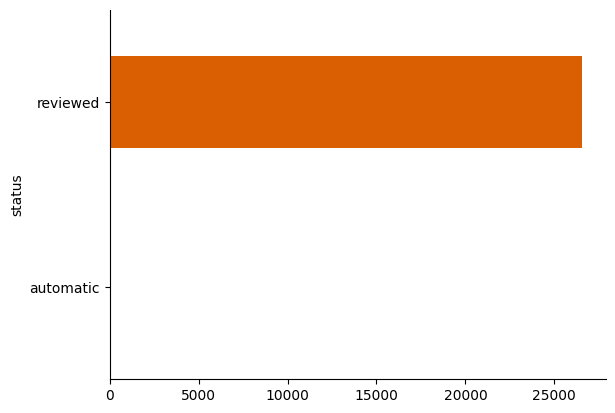

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Podemos ver entonces que todo esta revewed, entonces no ale la pena dejar esta columna

In [ ]:
tmbl = tmbl.drop(['status'], axis = 1)

In [ ]:
tmbl = tmbl.drop(['rms', 'net'], axis = 1)
tmbl.head()

,date,time,latitude,longitude,depth,mag,id,place,type,horizontalError,depthError,magError,locationSource
0,2023-01-01,00:49:25.294,52.0999,178.5218,82.770,3.10,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,us
1,2023-01-01,01:41:43.755,7.1397,126.7380,79.194,4.50,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,us
2,2023-01-01,03:29:31.070,19.1631,-66.5251,24.000,3.93,pr2023001000,Puerto Rico region,earthquake,0.91,15.950,0.090,pr
3,2023-01-01,04:09:32.814,-4.7803,102.7675,63.787,4.30,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,us
4,2023-01-01,04:29:13.793,53.3965,-166.9417,10.000,3.00,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,us


Vamos a checar si cambia la parte del type

In [ ]:
typ = pd.DataFrame(tmbl['type'])
typ.head(len(typ))

,type
0,earthquake
1,earthquake
2,earthquake
3,earthquake
4,earthquake
...,...
26637,earthquake
26638,earthquake
26639,earthquake
26640,earthquake


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

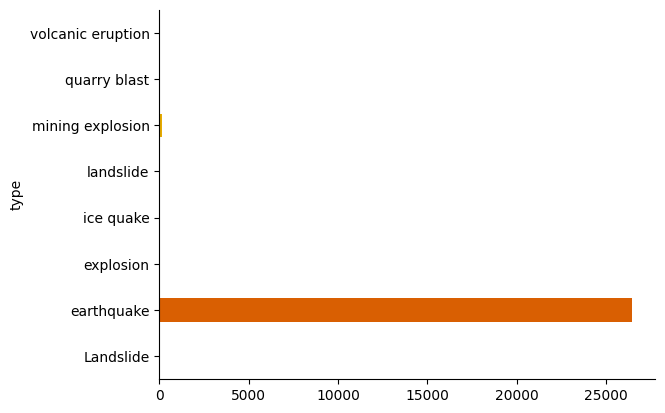

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Vamos a tomar solo los que sean causados por earthquake

In [ ]:
#vamos a hacer un nuevo DataFrame que sea de earthquakes (eq)

tmbl_eq = tmbl[tmbl['type'].str.contains('earthquake', case=False, na=False)]
tmbl_eq.head()

Ya tenemos esta parte bien, vamos a comprobarlo

In [ ]:
#comprobación
typ_eq = pd.DataFrame(tmbl_eq['type'])
typ_eq.head(len(typ_eq))

,type
0,earthquake
1,earthquake
2,earthquake
3,earthquake
4,earthquake
...,...
26637,earthquake
26638,earthquake
26639,earthquake
26640,earthquake


No charts were generated by quickchart


In [ ]:
#comprobamos el tmbl completo
tmbl_eq.head(len(tmbl_eq))

,date,time,latitude,longitude,depth,mag,id,place,type,horizontalError,depthError,magError,locationSource
0,2023-01-01,00:49:25.294,52.0999,178.5218,82.770,3.10,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,us
1,2023-01-01,01:41:43.755,7.1397,126.7380,79.194,4.50,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,us
2,2023-01-01,03:29:31.070,19.1631,-66.5251,24.000,3.93,pr2023001000,Puerto Rico region,earthquake,0.91,15.950,0.090,pr
3,2023-01-01,04:09:32.814,-4.7803,102.7675,63.787,4.30,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,us
4,2023-01-01,04:29:13.793,53.3965,-166.9417,10.000,3.00,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,2023-12-29,03:37:19.334,-6.9527,154.9829,10.000,5.20,us6000m0c5,"89 km SW of Panguna, Papua New Guinea",earthquake,10.07,1.765,0.048,us
26638,2023-12-29,04:38:54.109,32.3262,141.7386,10.000,5.10,us6000m0ch,"Izu Islands, Japan region",earthquake,9.17,1.870,0.042,us
26639,2023-12-29,08:42:05.747,-7.2411,68.0663,10.000,5.10,us6000m0dr,Chagos Archipelago region,earthquake,8.02,1.792,0.090,us
26640,2023-12-29,11:02:48.679,-19.1602,169.0428,153.264,4.70,us6000m0e5,"49 km NNW of Isangel, Vanuatu",earthquake,8.52,7.433,0.081,us


Ahora ya podemos quitar earthquake

In [ ]:
tmbl_eq=tmbl_eq.drop('type', axis = 1)

In [ ]:
tmbl_eq.head()

,date,time,latitude,longitude,depth,mag,id,place,horizontalError,depthError,magError,locationSource
0,2023-01-01,00:49:25.294,52.0999,178.5218,82.770,3.10,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",8.46,21.213,0.097,us
1,2023-01-01,01:41:43.755,7.1397,126.7380,79.194,4.50,us7000j3xk,"23 km ESE of Manay, Philippines",5.51,7.445,0.083,us
2,2023-01-01,03:29:31.070,19.1631,-66.5251,24.000,3.93,pr2023001000,Puerto Rico region,0.91,15.950,0.090,pr
3,2023-01-01,04:09:32.814,-4.7803,102.7675,63.787,4.30,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",10.25,6.579,0.238,us
4,2023-01-01,04:29:13.793,53.3965,-166.9417,10.000,3.00,us7000j1zd,"59 km SSW of Unalaska, Alaska",1.41,1.999,0.085,us



## Ahora vamos a checar que no haya datos nulos





In [ ]:
#checamos con un if
valores_nulos = tmbl_eq.isnull().values.any()

if valores_nulos:
    print("El DataFrame contiene valores nulos o NaN.")
else:
    print("El DataFrame no contiene valores nulos o NaN.")
#si hay valores nulos, tenemos que cambiarlos por un sin dato

El DataFrame no contiene valores nulos o NaN.


In [ ]:
#vamos a cambiar esos NaN por "sin dato"
tmbl_eq = tmbl_eq.fillna('sin datos')

## Ahora si guardamos la nueva tabla o DataFrame

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')
tmbl_eq.to_csv('/content/drive/My Drive/Temblores2023.csv', index=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tmbl_eq.to_csv('/content/drive/My Drive/Colab Notebooks/DataFrames/Temblores2023.csv', index=True)

vemos que la diferencia son simple omicion de algun numero, pero en realidad está todo bien, asi que solo quitamos las dos columnas y nos quedamos con el index de default, ya que se está contando igual